In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv


Starting the case studing importing it as data frame


In [2]:
df = pd.read_csv('../input/cardiogoodfitness/CardioGoodFitness.csv')
print(df.head())
print(df.describe())# without getting categorical data default
print(df.describe(include='all')) # this will get even categorical data
print(df.info())

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16

count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

is the values of abovr data



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

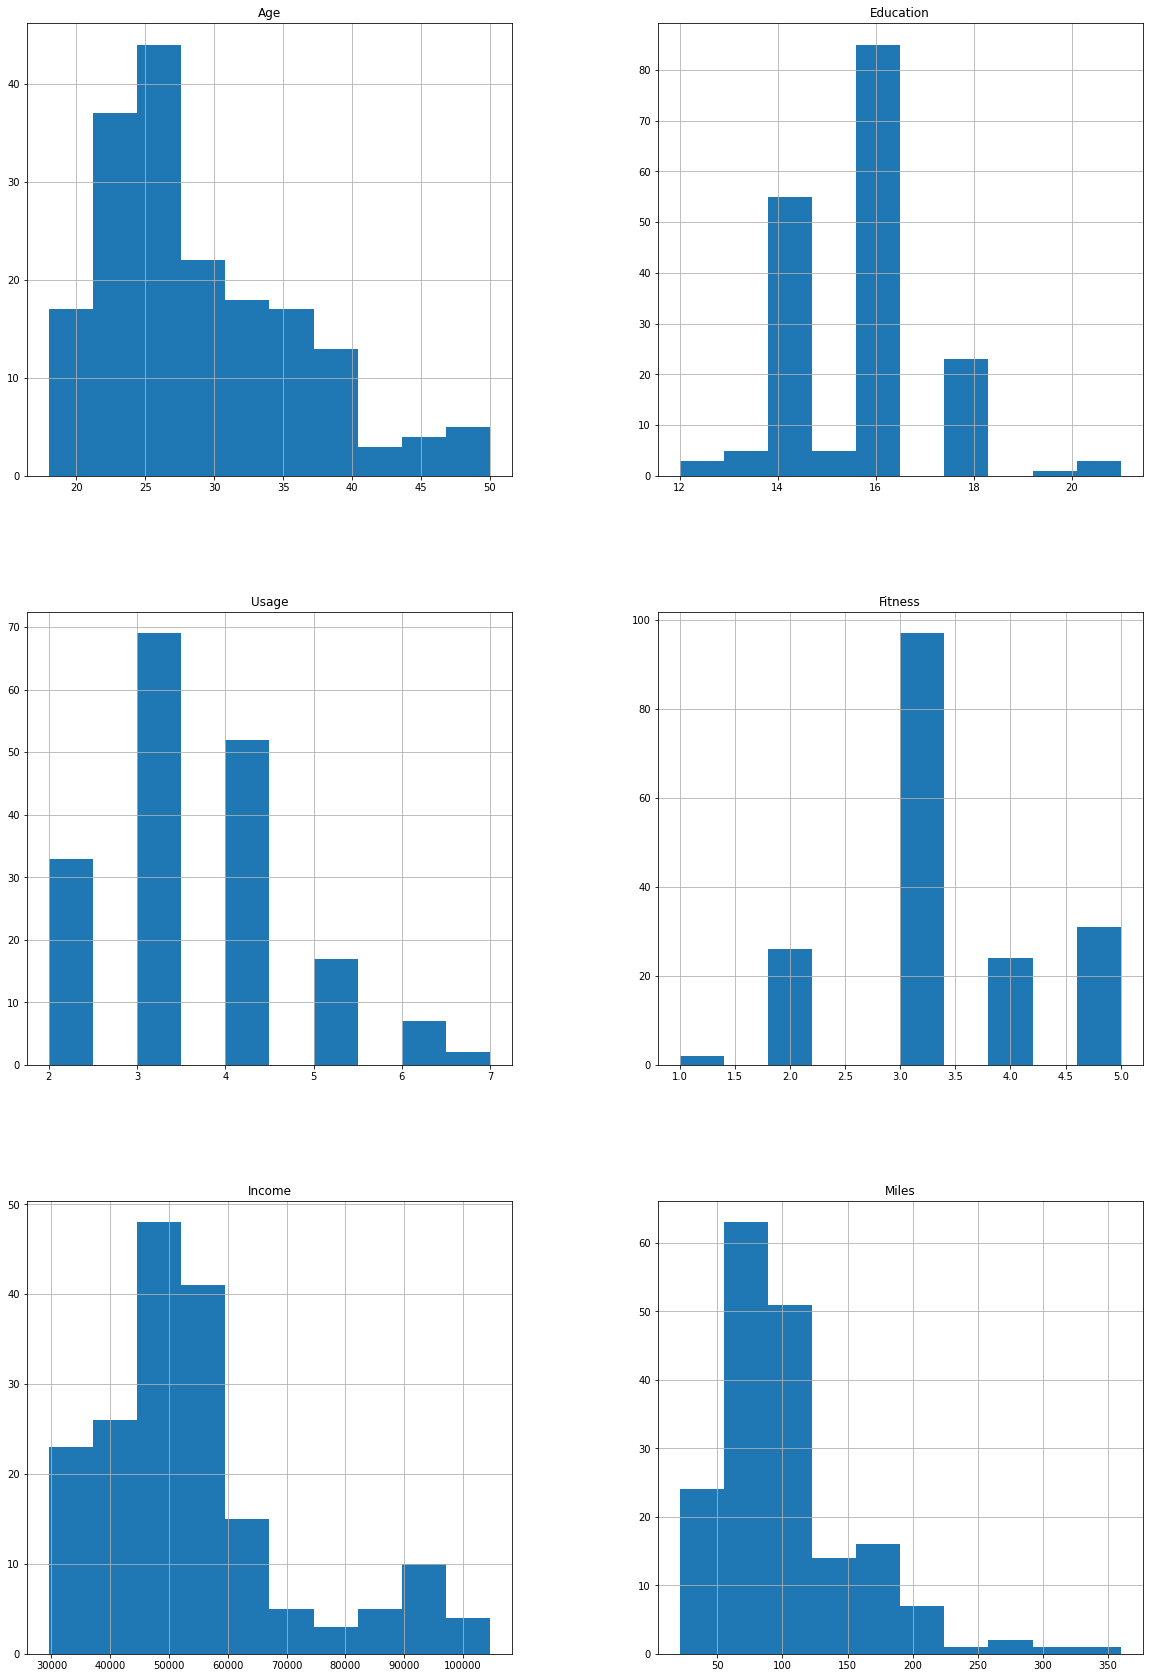

In [4]:
df.hist(figsize=(20,30))

<AxesSubplot:xlabel='Age', ylabel='Gender'>

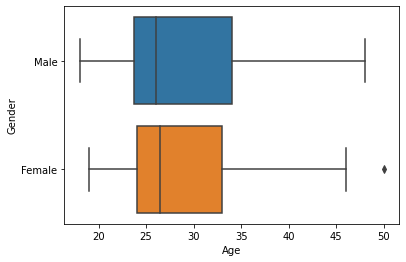

In [5]:
sns.boxplot(x = 'Age', y = 'Gender', data=df)

<h3>
    Age and Gender show right skewness
 </h3>

In [6]:
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


<h3>Product TM195 is popular with both male and female
TM1498 is more popular with male then female
TM798 is not liked by Females</h3>

In [7]:
pd.crosstab(df['Product'], df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<h3> TM195,TM498 and also 798 are more purchased by couples more than singles


<AxesSubplot:xlabel='Product', ylabel='count'>

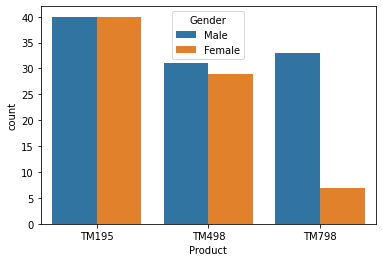

In [8]:
sns.countplot(x = 'Product', hue = 'Gender', data=df)

In [9]:
pd.pivot_table(df, index=['Product','Gender'],columns=['MaritalStatus'])

Age             Education              Fitness  \
MaritalStatus   Partnered     Single  Partnered     Single Partnered   
Product Gender                                                         
TM195   Female  28.333333  28.692308  14.888889  15.538462  2.851852   
        Male    31.380952  25.631579  15.428571  14.473684  2.857143   
TM498   Female  30.000000  28.142857  15.200000  15.214286  2.933333   
        Male    30.380952  25.200000  15.285714  14.500000  2.904762   
TM798   Female  29.000000  24.333333  17.500000  18.333333  5.000000   
        Male    30.000000  28.928571  17.421053  16.928571  4.631579   

                                Income                     Miles              \
MaritalStatus     Single     Partnered        Single   Partnered      Single   
Product Gender                                                                 
TM195   Female  2.923077  46153.777778  45742.384615   74.925926   78.846154   
        Male    3.263158  50028.000000  43265.842105   80.190476   99.526316   
TM498   Female  2.785714  49724.800000  48920.357143   94.000000   80.214286   
        Male    3.000000  49378.285714  47071.800000   87.238095   91.100000   
TM798   Female  4.000000  84972.250000  58516.000000  215.000000  133.333333   
        Male    4.642857  81431.368421  68216.428571  176.315789  147.571429   

                   Usage            
MaritalStatus  Partnered    Single  
Product Gender                      
TM195   Female  2.851852  3.000000  
        Male    3.285714  3.263158  
TM498   Female  3.333333  2.928571  
        Male    2.857143  3.300000  
TM798   Female  5.250000  4.666667  
        Male    4.842105  4.571429

<p>

ITs showing the product as index
its giving the avg value of age group of male and femal who as using a perticular product

TM195 	Female 	28.333333
        Male 	31.380952
TM498 	Female 	30.000000
        Male 	30.380952
 </p>

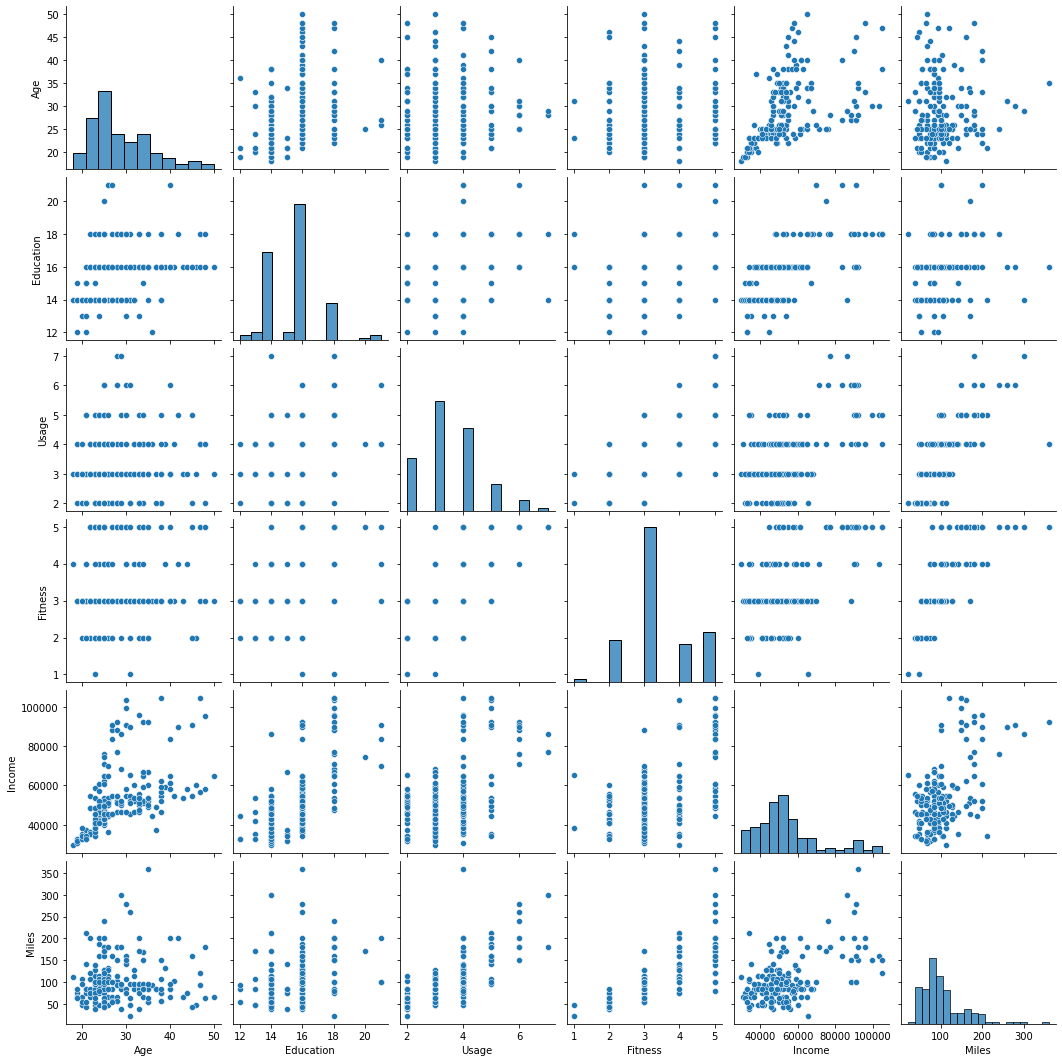

In [10]:
sns.pairplot(df)

A slight liner realtion is obsereved with age and income also with miles and age
